## Part 1 - Calculations

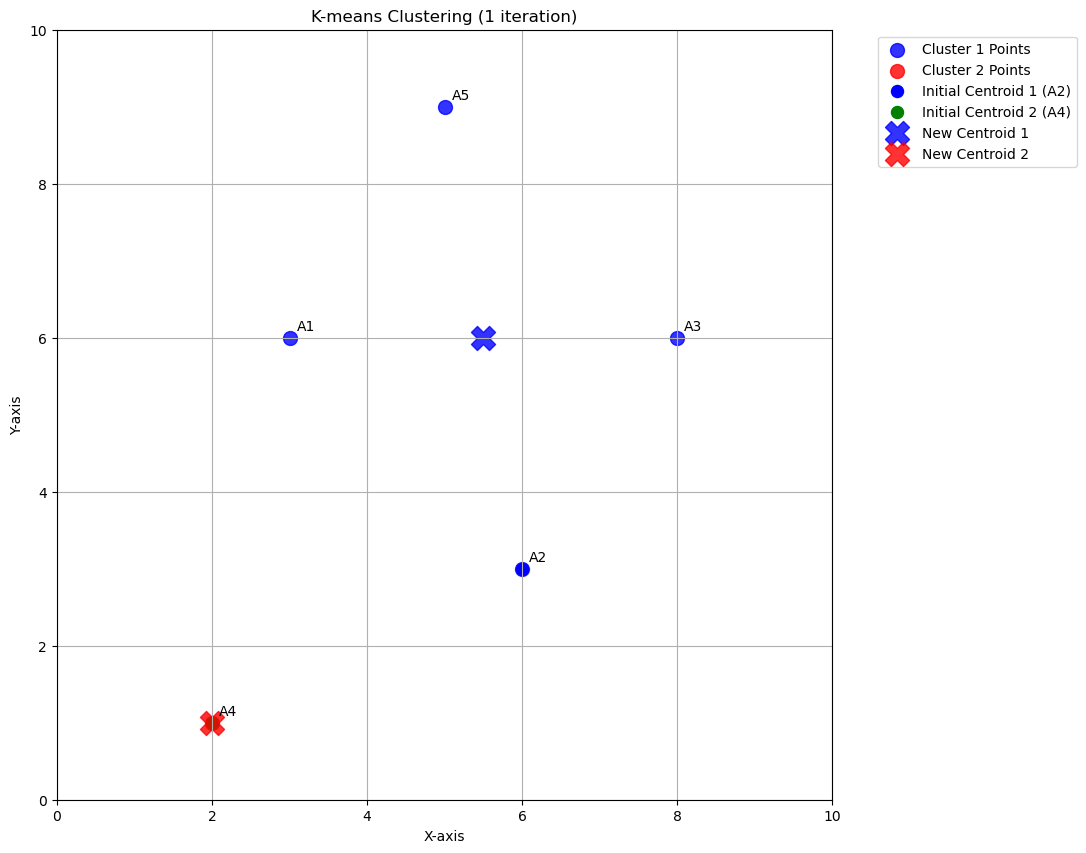


Clustering Results:
-----------------
Distances from points to initial centroids:

Point A1 (3, 6):
Distance to C1 (A2): 4.24
Distance to C2 (A4): 5.10
Assigned to Cluster: 1

Point A2 (6, 3):
Distance to C1 (A2): 0.00
Distance to C2 (A4): 4.47
Assigned to Cluster: 1

Point A3 (8, 6):
Distance to C1 (A2): 3.61
Distance to C2 (A4): 7.81
Assigned to Cluster: 1

Point A4 (2, 1):
Distance to C1 (A2): 4.47
Distance to C2 (A4): 0.00
Assigned to Cluster: 2

Point A5 (5, 9):
Distance to C1 (A2): 6.08
Distance to C2 (A4): 8.54
Assigned to Cluster: 1

New centroids:
Cluster 1: (5.50, 6.00)
Cluster 2: (2.00, 1.00)

Silhouette Score Calculations:
------------------------

Silhouette Scores for each point:
 Point A1: 0.16
 Point A2: -0.04
 Point A3: 0.45
 Point A4: 0.00
 Point A5: 0.46

Silhouette Score (Overall): 0.21

WSS Calculation Details:
------------------------

Cluster 1:
 Point [3 6] -> Centroid [5.5 6. ]: Distance = 2.50, Squared Distance = 6.25
 Point [6 3] -> Centroid [5.5 6. ]: Dista

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples

# Define the data points
points = np.array([
    [3, 6],  # A1
    [6, 3],  # A2
    [8, 6],  # A3
    [2, 1],  # A4
    [5, 9]   # A5
])

# Initial centroids (A2 and A4)
initial_centroids = np.array([
    [6, 3],  # C1 (A2)
    [2, 1]   # C2 (A4)
])

# Function to calculate Euclidean distance
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Assign points to clusters based on distance to initial centroids
cluster_labels = []
for point in points:
    dist_to_c1 = euclidean_distance(point, initial_centroids[0])
    dist_to_c2 = euclidean_distance(point, initial_centroids[1])
    cluster_labels.append(0 if dist_to_c1 < dist_to_c2 else 1)
cluster_labels = np.array(cluster_labels)

# Calculate new centroids
cluster1_points = points[cluster_labels == 0]
cluster2_points = points[cluster_labels == 1]
new_centroids = np.array([
    np.mean(cluster1_points, axis=0),
    np.mean(cluster2_points, axis=0)
])

# Visualize the clusters and centroids
plt.figure(figsize=(10, 10))
plt.grid(True)

# Plot points for each cluster
plt.scatter(points[cluster_labels == 0][:, 0], points[cluster_labels == 0][:, 1], 
            c='blue', s=100, alpha=0.8, label='Cluster 1 Points')
plt.scatter(points[cluster_labels == 1][:, 0], points[cluster_labels == 1][:, 1], 
            c='red', s=100, alpha=0.8, label='Cluster 2 Points')

# Plot initial centroids
plt.scatter(initial_centroids[0, 0], initial_centroids[0, 1], 
            c='blue', marker='.', s=300, facecolors='none', label='Initial Centroid 1 (A2)')
plt.scatter(initial_centroids[1, 0], initial_centroids[1, 1], 
            c='green', marker='.', s=300, facecolors='none', label='Initial Centroid 2 (A4)')

# Plot new centroids
plt.scatter(new_centroids[0, 0], new_centroids[0, 1], 
            c='blue', marker='X', s=300, alpha=0.8, label='New Centroid 1')
plt.scatter(new_centroids[1, 0], new_centroids[1, 1], 
            c='red', marker='X', s=300, alpha=0.8, label='New Centroid 2')

# Add point labels
for i, (x, y) in enumerate(points):
    plt.annotate(f'A{i+1}', (x, y), xytext=(5, 5), textcoords='offset points')

# Set plot limits and labels
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-means Clustering (1 iteration)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Print distances and cluster assignment
print("\nClustering Results:")
print("-----------------")
print("Distances from points to initial centroids:")
for i, point in enumerate(points):
    dist_to_c1 = euclidean_distance(point, initial_centroids[0])
    dist_to_c2 = euclidean_distance(point, initial_centroids[1])
    print(f"\nPoint A{i+1} ({point[0]}, {point[1]}):")
    print(f"Distance to C1 (A2): {dist_to_c1:.2f}")
    print(f"Distance to C2 (A4): {dist_to_c2:.2f}")
    print(f"Assigned to Cluster: {cluster_labels[i] + 1}")

print("\nNew centroids:")
for i, centroid in enumerate(new_centroids):
    print(f"Cluster {i + 1}: ({centroid[0]:.2f}, {centroid[1]:.2f})")

    
print("\nSilhouette Score Calculations:")
print("------------------------")

# Calculate Silhouette Score for each point
silhouette_vals = silhouette_samples(points, cluster_labels)

print("\nSilhouette Scores for each point:")
for i, score in enumerate(silhouette_vals):
    print(f" Point A{i+1}: {score:.2f}")
    
sil_score = silhouette_score(points, cluster_labels)
print(f"\nSilhouette Score (Overall): {sil_score:.2f}")

# Calculate WSS (Within-Cluster Sum of Squares)
def calculate_wss(points, labels, centroids):
    wss_cluster1 = 0
    wss_cluster2 = 0

    print("\nWSS Calculation Details:")
    print("------------------------")

    # Cluster 1 (centroid 0)
    print("\nCluster 1:")
    for i, point in enumerate(points[labels == 0]):
        dist = euclidean_distance(point, centroids[0])
        squared_dist = dist ** 2
        wss_cluster1 += squared_dist
        print(f" Point {point} -> Centroid {centroids[0]}: Distance = {dist:.2f}, Squared Distance = {squared_dist:.2f}")
    
    print("")
    print(f" WSS for Cluster 1: {wss_cluster1:.2f}")

    # Cluster 2 (centroid 1)
    print("\nCluster 2:")
    for i, point in enumerate(points[labels == 1]):
        dist = euclidean_distance(point, centroids[1])
        squared_dist = dist ** 2
        wss_cluster2 += squared_dist
        print(f" Point {point} -> Centroid {centroids[1]}: Distance = {dist:.2f}, Squared Distance = {squared_dist:.2f}")

    print("")
    print(f" WSS for Cluster 2: {wss_cluster2:.2f}")

    total_wss = wss_cluster1 + wss_cluster2
    print(f"\nTotal WSS: {total_wss:.2f}")
    return wss_cluster1, wss_cluster2

wss_c1, wss_c2 = calculate_wss(points, cluster_labels, new_centroids)

## Part 2 - Programming

In [38]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Excel file
df = pd.read_csv('MCSDatasetNEXTCONLab.csv')

In [39]:
'''Split into test-train sets'''

# Features and target
features = ['Latitude', 'Longitude', 'Hour', 'Minute', 'Duration', 
           'RemainingTime', 'Resources', 'Coverage', 'OnPeakHours', 'GridNumber']
X = df[features]
y = df['Legitimacy']

# Split data based on Day values
X_train = X[df['Day'].isin([0, 1, 2])]
X_test = X[df['Day'] == 3]
y_train = y[df['Day'].isin([0, 1, 2])]
y_test = y[df['Day'] == 3]


# Scaling features to use only for KNN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
# Create and train both models
nb_model = GaussianNB()
knn_model = KNeighborsClassifier(n_neighbors=5)  # K = 5

nb_model.fit(X_train, y_train)
knn_model.fit(X_train_scaled, y_train)

# Make predictions with both models
nb_pred = nb_model.predict(X_test)
knn_pred = knn_model.predict(X_test_scaled)

# Calculate probabilities
nb_prob = nb_model.predict_proba(X_test)
knn_prob = knn_model.predict_proba(X_test_scaled)


=== Naive Bayes Results ===

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       312
           1       0.87      1.00      0.93      2148

    accuracy                           0.87      2460
   macro avg       0.44      0.50      0.47      2460
weighted avg       0.76      0.87      0.81      2460



C:\Users\amoka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\amoka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\amoka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 800x600 with 0 Axes>

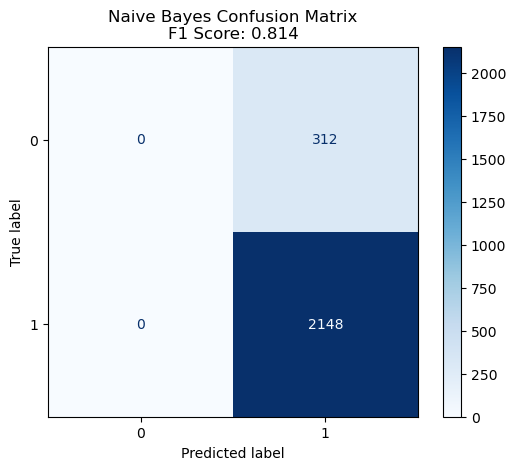


=== KNN Results ===

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.43      0.45       312
           1       0.92      0.93      0.92      2148

    accuracy                           0.87      2460
   macro avg       0.69      0.68      0.68      2460
weighted avg       0.86      0.87      0.86      2460



<Figure size 800x600 with 0 Axes>

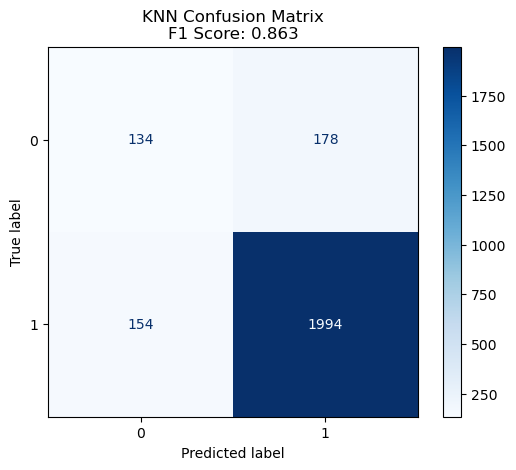


=== Overall Accuracy ===
Naive Bayes F1-score: 0.8140
KNN F1-score: 0.8627


In [41]:
# Print performance metrics for both models
print("\n=== Naive Bayes Results ===")
print("\nClassification Report:")
print(classification_report(y_test, nb_pred))

# Calculate F1 score for NB
nb_f1 = f1_score(y_test, nb_pred, average='weighted')

# Plot NB confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    nb_pred,
    display_labels=['0', '1'],
    cmap='Blues'
)
plt.title(f'Naive Bayes Confusion Matrix\nF1 Score: {nb_f1:.3f}')
plt.show()

print("\n=== KNN Results ===")
print("\nClassification Report:")
print(classification_report(y_test, knn_pred))

# Calculate F1 score for KNN
knn_f1 = f1_score(y_test, knn_pred, average='weighted')

# Plot KNN confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    knn_pred,
    display_labels=['0', '1'],
    cmap='Blues'
)
plt.title(f'KNN Confusion Matrix\nF1 Score: {knn_f1:.3f}')
plt.show()

# Save predictions from both models
results_df = pd.DataFrame({
    'Actual': y_test,
    'NB_Predicted': nb_pred,
    'NB_Probability_Class_0': nb_prob[:, 0],
    'NB_Probability_Class_1': nb_prob[:, 1],
    'KNN_Predicted': knn_pred,
    'KNN_Probability_Class_0': knn_prob[:, 0],
    'KNN_Probability_Class_1': knn_prob[:, 1]
})

# Compare the F1 scores
print("\n=== Overall Accuracy ===")
print(f"Naive Bayes F1-score: {nb_f1:.4f}")
print(f"KNN F1-score: {knn_f1:.4f}")

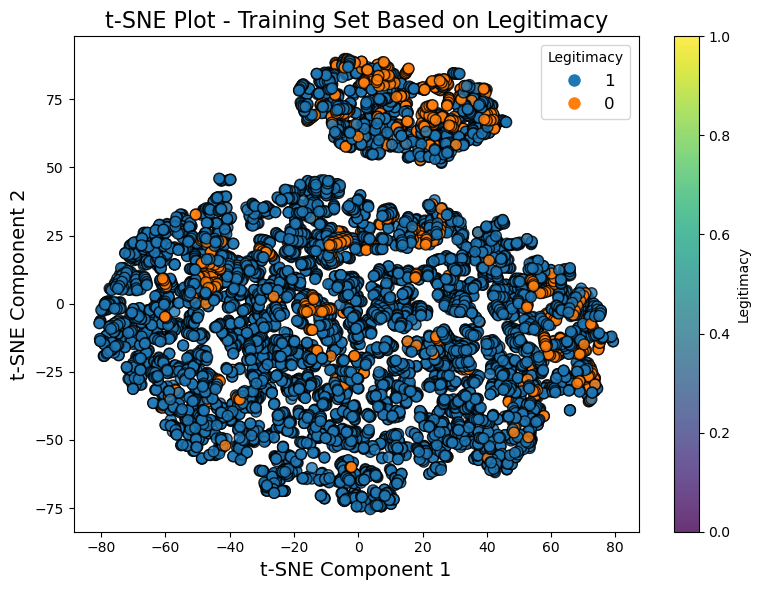

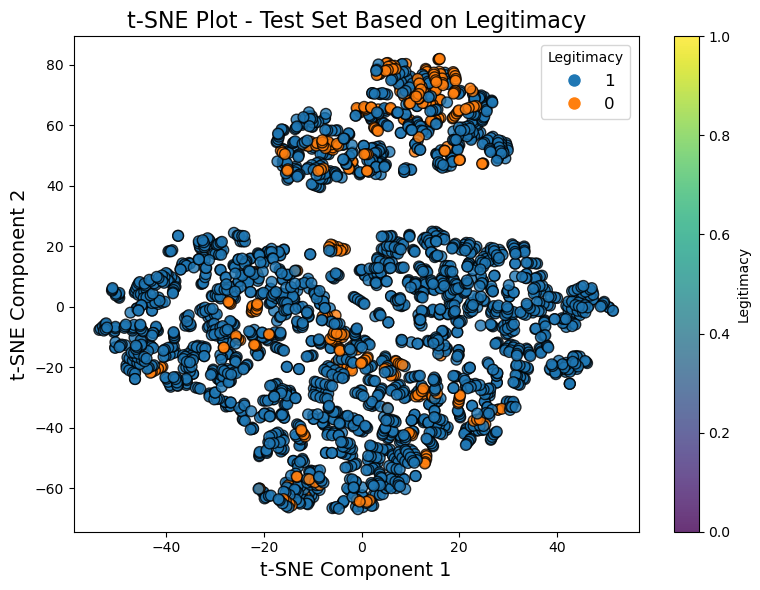

In [49]:
'''TSNE plots'''

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Create t-SNE objects
tsne = TSNE(n_components=2, random_state=0)

# Fit and transform training data
tsne_train = tsne.fit_transform(X_train_scaled)

# Transform test data
tsne_test = TSNE(n_components=2, random_state=0).fit_transform(X_test_scaled)

# Define colors for the two classes
legitimate_color = '#1f77b4'  # Blue for 1 (legitimate)
illegitimate_color = '#ff7f0e'  # Orange for 0 (illegitimate)

# Plot the t-SNE for the training set separately with adjusted figure size
plt.figure(figsize=(8, 6))  # Slightly smaller figure
scatter_train = plt.scatter(tsne_train[:, 0], tsne_train[:, 1], 
                            c=[legitimate_color if label == 1 else illegitimate_color for label in y_train], 
                            alpha=0.8, edgecolors='k', s=60)
plt.title('t-SNE Plot - Training Set', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=14)
plt.ylabel('t-SNE Component 2', fontsize=14)
plt.colorbar(scatter_train, label='Legitimacy')

# Manually setting the legend with actual numbers (1 for legitimate, 0 for illegitimate)
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=legitimate_color, markersize=10, label="1"),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=illegitimate_color, markersize=10, label="0")
], title="Legitimacy", fontsize=12)

plt.tight_layout()
plt.show()

# Plot the t-SNE for the test set separately with adjusted figure size
plt.figure(figsize=(8, 6))  # Slightly smaller figure
scatter_test = plt.scatter(tsne_test[:, 0], tsne_test[:, 1], 
                           c=[legitimate_color if label == 1 else illegitimate_color for label in y_test], 
                           alpha=0.8, edgecolors='k', s=60)
plt.title('t-SNE Plot - Test Set', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=14)
plt.ylabel('t-SNE Component 2', fontsize=14)
plt.colorbar(scatter_test, label='Legitimacy')

# Manually setting the legend with actual numbers (1 for legitimate, 0 for illegitimate)
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=legitimate_color, markersize=10, label="1"),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=illegitimate_color, markersize=10, label="0")
], title="Legitimacy", fontsize=12)

plt.tight_layout()
plt.show()

## Part 3 - Dimensionality Reduction & Analysis

Baseline NB Score: 0.8418
Baseline KNN Score: 0.8321
77/77 [==============================] - 0s 788us/step


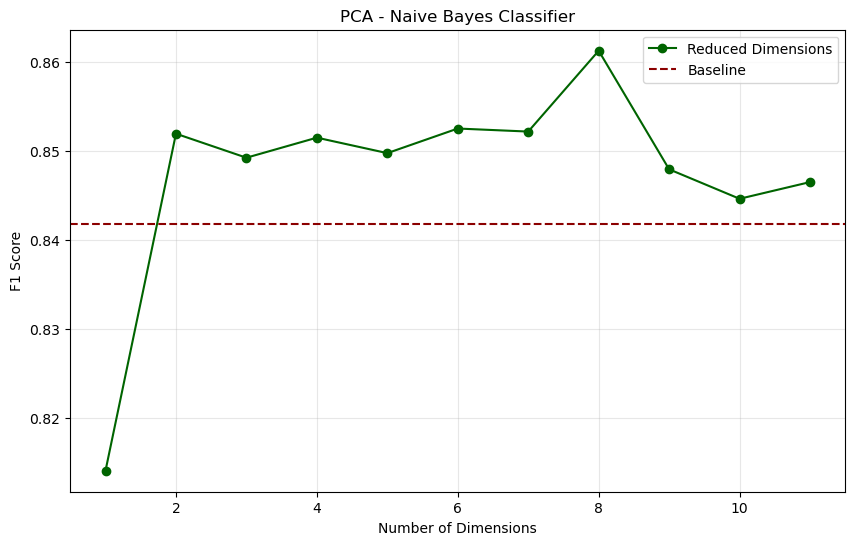

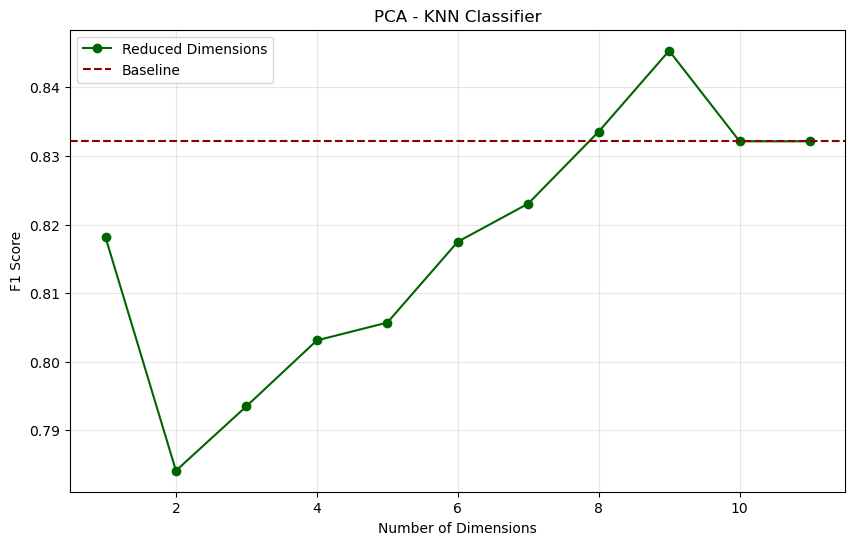

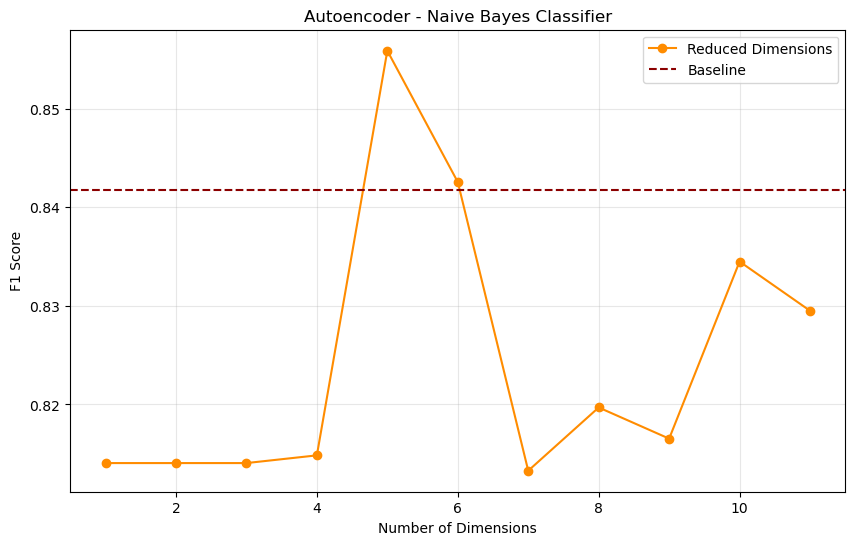

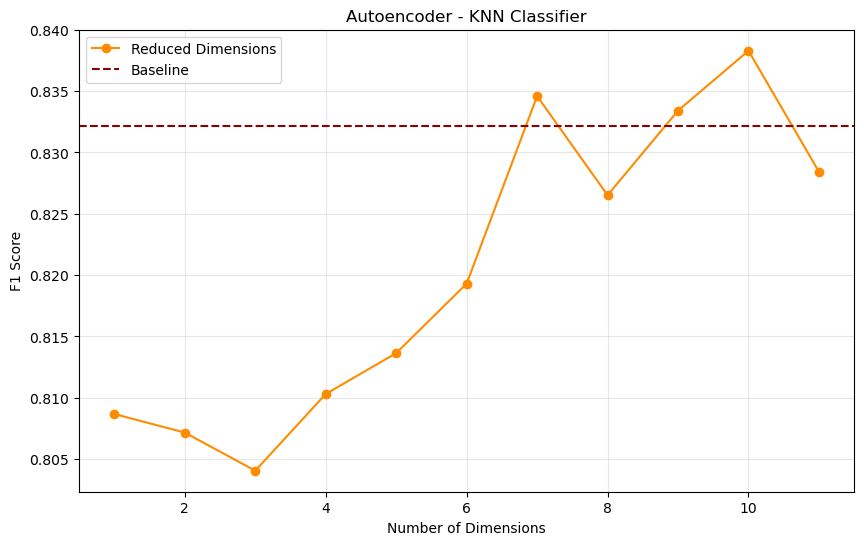

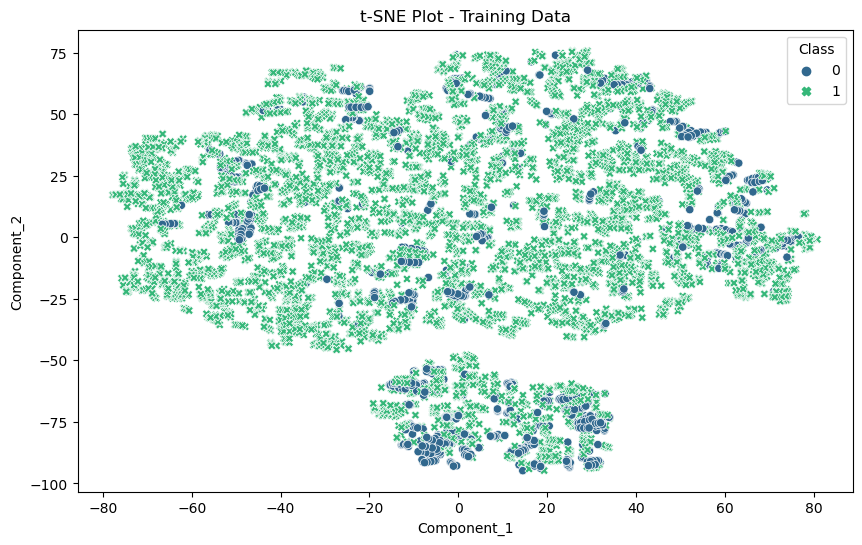

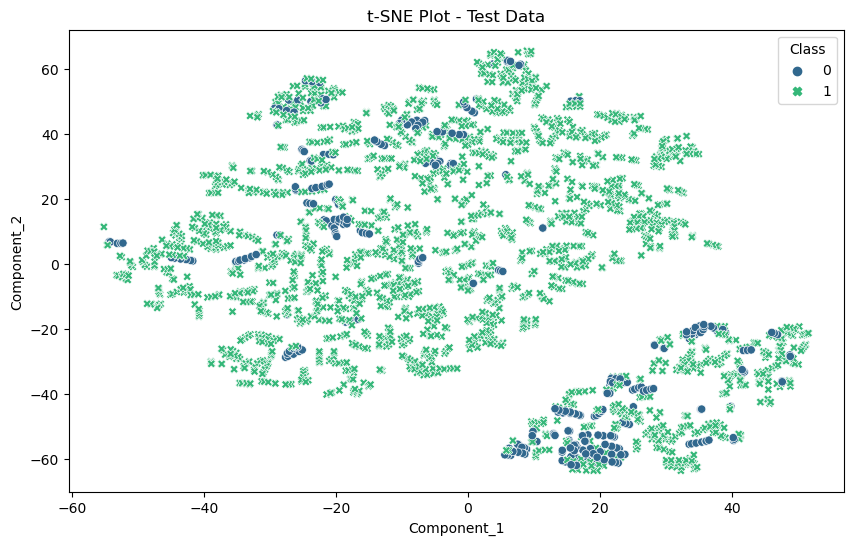

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.manifold import TSNE

# Load data
raw_data = pd.read_csv('MCSDatasetNEXTCONLab.csv')

# Define input columns for analysis
input_columns = ['Latitude', 'Longitude', 'Day', 'Hour', 'Minute', 
                'Duration', 'RemainingTime', 'Resources', 'Coverage', 
                'OnPeakHours', 'GridNumber']
output_column = 'Legitimacy'

# Split data into training (Days 0-2) and validation (Day 3)
training_subset = raw_data[raw_data['Day'].isin([0, 1, 2])]
validation_subset = raw_data[raw_data['Day'] == 3]

# Extract features and labels
X_training = training_subset[input_columns]
y_training = training_subset[output_column]
X_validation = validation_subset[input_columns]
y_validation = validation_subset[output_column]

# Normalize features
normalizer = StandardScaler()
X_training_norm = normalizer.fit_transform(X_training)
X_validation_norm = normalizer.transform(X_validation)

# Establish baseline performance
def evaluate_baseline_models(X_train, y_train, X_test, y_test):
    # Naive Bayes
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    nb_preds = nb_model.predict(X_test)
    nb_score = f1_score(y_test, nb_preds, average='weighted')
    
    # K-Nearest Neighbors
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    knn_preds = knn_model.predict(X_test)
    knn_score = f1_score(y_test, knn_preds, average='weighted')
    
    return nb_score, knn_score

baseline_nb, baseline_knn = evaluate_baseline_models(
    X_training_norm, y_training, X_validation_norm, y_validation
)
print(f"Baseline NB Score: {baseline_nb:.4f}")
print(f"Baseline KNN Score: {baseline_knn:.4f}")

# PCA Reduction
dimension_range = range(1, X_training_norm.shape[1] + 1)
nb_scores_pca = []
knn_scores_pca = []

for dim in dimension_range:
    # Reduce dimensions
    reducer = PCA(n_components=dim)
    X_train_reduced = reducer.fit_transform(X_training_norm)
    X_val_reduced = reducer.transform(X_validation_norm)
    
    # Evaluate models
    nb_score, knn_score = evaluate_baseline_models(
        X_train_reduced, y_training, X_val_reduced, y_validation
    )
    nb_scores_pca.append(nb_score)
    knn_scores_pca.append(knn_score)

# Autoencoder Reduction
def create_autoencoder(input_dims, encoding_dims):
    inputs = Input(shape=(input_dims,))
    encoded = Dense(encoding_dims, activation='relu')(inputs)
    decoded = Dense(input_dims, activation='linear')(encoded)
    
    full_model = Model(inputs=inputs, outputs=decoded)
    encoder_model = Model(inputs=inputs, outputs=encoded)
    
    full_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return full_model, encoder_model

nb_scores_ae = []
knn_scores_ae = []
input_dimension = X_training_norm.shape[1]

for dim in dimension_range:
    # Train autoencoder
    autoencoder, encoder = create_autoencoder(input_dimension, dim)
    autoencoder.fit(
        X_training_norm, X_training_norm,
        epochs=50, batch_size=32,
        shuffle=False, verbose=0
    )
    
    # Transform data
    X_train_encoded = encoder.predict(X_training_norm)
    X_val_encoded = encoder.predict(X_validation_norm)
    
    # Evaluate models
    nb_score, knn_score = evaluate_baseline_models(
        X_train_encoded, y_training, X_val_encoded, y_validation
    )
    nb_scores_ae.append(nb_score)
    knn_scores_ae.append(knn_score)

# Visualization for plots
def plot_model_performance(dims, scores, baseline, title, color):
    plt.figure(figsize=(10, 6))
    plt.plot(dims, scores, marker='o', linestyle='-', 
            color=color, label='Reduced Dimensions')
    plt.axhline(y=baseline, color='darkred', 
                linestyle='--', label='Baseline')
    plt.title(title)
    plt.xlabel('Number of Dimensions')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Plot results
plot_model_performance(
    dimension_range, nb_scores_pca, baseline_nb,
    'PCA - Naive Bayes Classifier', 'darkgreen'
)

plot_model_performance(
    dimension_range, knn_scores_pca, baseline_knn,
    'PCA - KNN Classifier', 'darkgreen'
)

plot_model_performance(
    dimension_range, nb_scores_ae, baseline_nb,
    'Autoencoder - Naive Bayes Classifier', 'darkorange'
)

plot_model_performance(
    dimension_range, knn_scores_ae, baseline_knn,
    'Autoencoder - KNN Classifier', 'darkorange'
)

# Find the optimal dimensions and apply reduction (In this PCA is the best)
optimal_dims = np.argmax(nb_scores_pca) + 1
final_reducer = PCA(n_components=optimal_dims)
X_train_final = final_reducer.fit_transform(X_training_norm)
X_val_final = final_reducer.transform(X_validation_norm)

# Create t-SNE visualizations
def create_tsne_visualization(X, y, title):
    tsne = TSNE(n_components=2, random_state=0)
    transformed_data = tsne.fit_transform(X)
    
    viz_df = pd.DataFrame({
        'Component_1': transformed_data[:, 0],
        'Component_2': transformed_data[:, 1],
        'Class': y.reset_index(drop=True)
    })
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=viz_df, 
        x='Component_1', 
        y='Component_2', 
        hue='Class',
        palette='viridis', 
        style='Class'
    )
    plt.title(title)
    plt.legend(title='Class')
    plt.show()

# Generate final visualizations
create_tsne_visualization(
    X_train_final, y_training,
    't-SNE Plot - Training Data'
)

create_tsne_visualization(
    X_val_final, y_validation,
    't-SNE Plot - Test Data'
)

## Part 4 - Feature Selection & Exploration

Baseline NB Score: 0.8418
Baseline KNN Score: 0.8321

Information Gain Results:
           Feature  Information_Gain
10     GridNumber          0.346019
0        Latitude          0.204745
1       Longitude          0.184729
3            Hour          0.064586
7       Resources          0.043453
9     OnPeakHours          0.029291
8        Coverage          0.016056
5        Duration          0.009266
2             Day          0.003732
4          Minute          0.000000
6   RemainingTime          0.000000


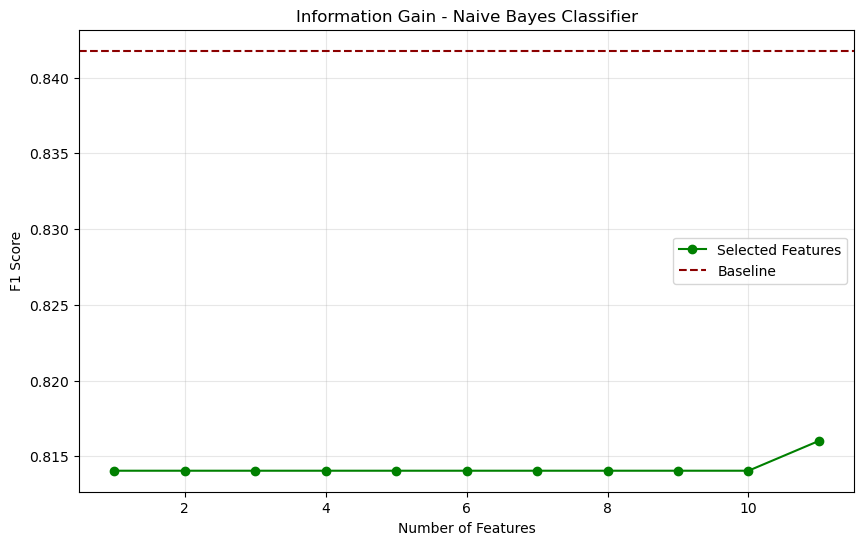

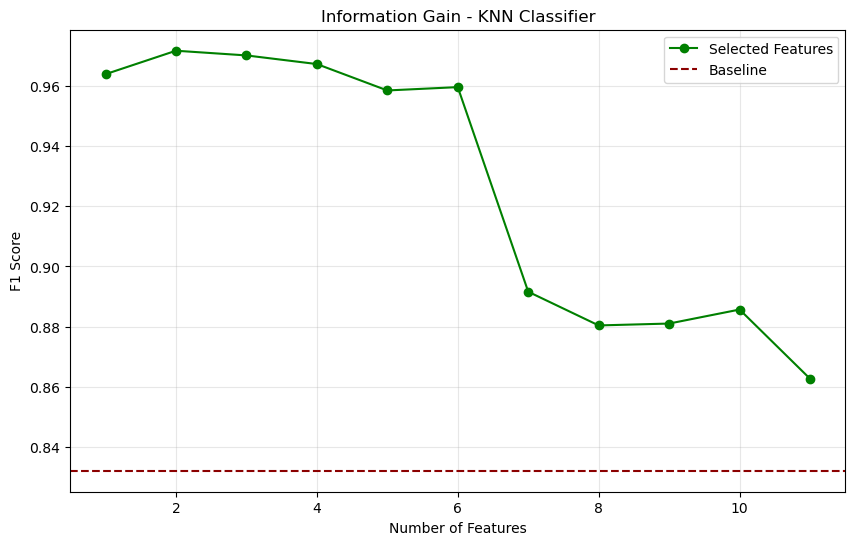

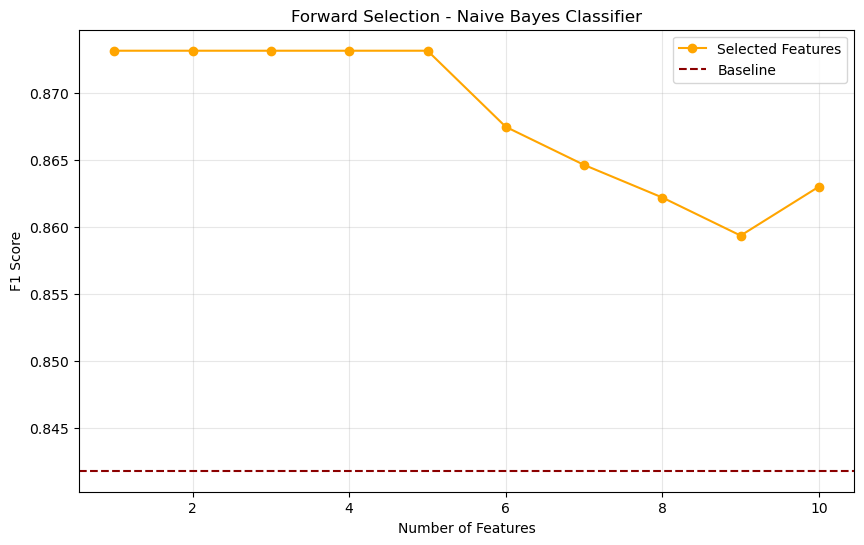

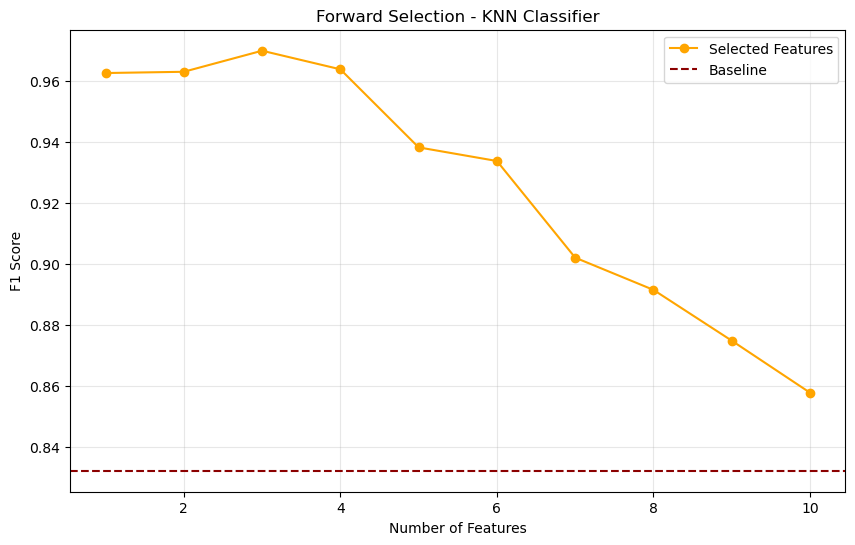

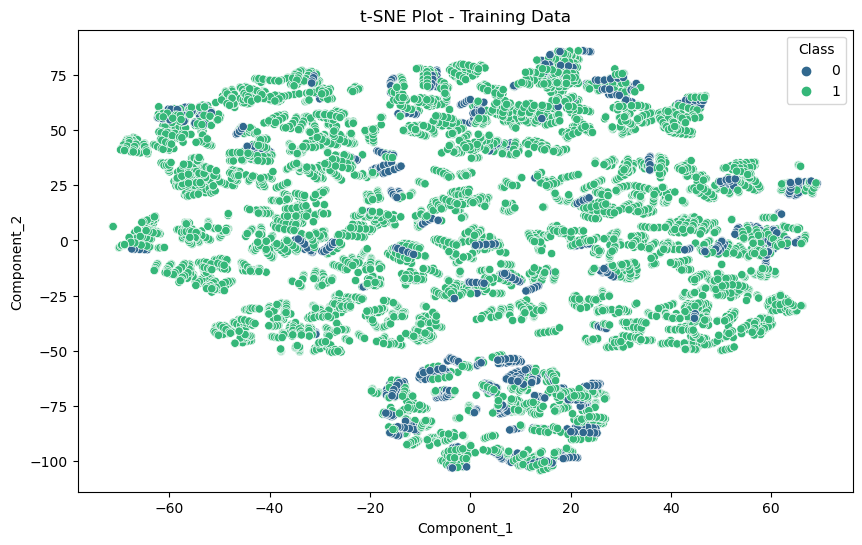

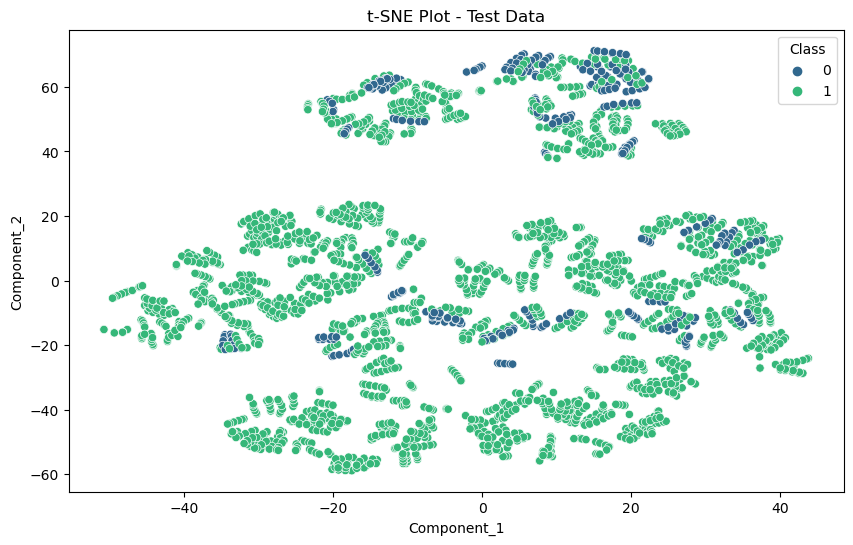

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif, SequentialFeatureSelector
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load data
raw_data = pd.read_csv('MCSDatasetNEXTCONLab.csv')

# Define input columns for analysis
input_columns = ['Latitude', 'Longitude', 'Day', 'Hour', 'Minute', 
                 'Duration', 'RemainingTime', 'Resources', 'Coverage', 
                 'OnPeakHours', 'GridNumber']
output_column = 'Legitimacy'

# Split data into training (Days 0-2) and validation (Day 3)
training_subset = raw_data[raw_data['Day'].isin([0, 1, 2])]
validation_subset = raw_data[raw_data['Day'] == 3]

# Extract features and labels
X_training = training_subset[input_columns]
y_training = training_subset[output_column]
X_validation = validation_subset[input_columns]
y_validation = validation_subset[output_column]

# Normalize features
normalizer = StandardScaler()
X_training_norm = normalizer.fit_transform(X_training)
X_validation_norm = normalizer.transform(X_validation)

# Baseline performance evaluation function
def evaluate_baseline_models(X_train, y_train, X_test, y_test):
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    nb_preds = nb_model.predict(X_test)
    nb_score = f1_score(y_test, nb_preds, average='weighted')
    
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    knn_preds = knn_model.predict(X_test)
    knn_score = f1_score(y_test, knn_preds, average='weighted')
    
    return nb_score, knn_score

# Evaluate baseline models
baseline_nb, baseline_knn = evaluate_baseline_models(X_training_norm, y_training, X_validation_norm, y_validation)
print(f"Baseline NB Score: {baseline_nb:.4f}")
print(f"Baseline KNN Score: {baseline_knn:.4f}")

# Information Gain Analysis
def analyze_information_gain(X_train, y_train):
    info_gains = mutual_info_classif(X_train, y_train, random_state=0)
    feature_importance = pd.DataFrame({
        'Feature': input_columns,
        'Information_Gain': info_gains
    }).sort_values('Information_Gain', ascending=False)
    return feature_importance

# Perform Information Gain analysis
info_gain_results = analyze_information_gain(X_training_norm, y_training)
print("\nInformation Gain Results:\n", info_gain_results)

# Evaluate Information Gain-based feature selection
nb_scores_ig = []
knn_scores_ig = []
for n_features in range(1, len(input_columns) + 1):
    selected_features = info_gain_results['Feature'].head(n_features).tolist()
    
    nb_model = GaussianNB()
    nb_model.fit(X_training[selected_features], y_training)
    nb_preds = nb_model.predict(X_validation[selected_features])
    nb_scores_ig.append(f1_score(y_validation, nb_preds, average='weighted'))
    
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_training[selected_features], y_training)
    knn_preds = knn_model.predict(X_validation[selected_features])
    knn_scores_ig.append(f1_score(y_validation, knn_preds, average='weighted'))

# Sequential Forward Selection (SFS) - Naive Bayes
nb_scores_sfs = []
nb_fs_features = []

# Initialize a fresh Naive Bayes model
nb_model = GaussianNB()

for f in range(1, len(input_columns)):
    # Perform Sequential Forward Selection
    sfs = SequentialFeatureSelector(nb_model, n_features_to_select=f, direction='forward')
    sfs.fit(X_training_norm, y_training)
    
    # Get selected feature indices
    selected_features = sfs.get_support(indices=True)
    
    # Select features for training and testing
    X_train_sfs = X_training_norm[:, selected_features]
    X_test_sfs = X_validation_norm[:, selected_features]
    
    # Train and evaluate the Naive Bayes model
    nb_model.fit(X_train_sfs, y_training)
    nb_predictions = nb_model.predict(X_test_sfs)
    nb_acc = accuracy_score(y_validation, nb_predictions)
    
    # Append results
    nb_scores_sfs.append(nb_acc)
    nb_fs_features.append([input_columns[i] for i in selected_features])
    
# Sequential Forward Selection (SFS) - KNN
knn_scores_sfs = []
knn_fs_features = []

# Initialize a fresh KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

for f in range(1, len(input_columns)):
    # Perform Sequential Forward Selection
    sfs = SequentialFeatureSelector(knn_model, n_features_to_select=f, direction='forward')
    sfs.fit(X_training_norm, y_training)
    
    # Get selected feature indices
    selected_features = sfs.get_support(indices=True)
    
    # Select features for training and testing
    X_train_sfs = X_training_norm[:, selected_features]
    X_test_sfs = X_validation_norm[:, selected_features]
    
    # Train and evaluate the KNN model
    knn_model.fit(X_train_sfs, y_training)
    knn_predictions = knn_model.predict(X_test_sfs)
    knn_acc = accuracy_score(y_validation, knn_predictions)
    
    # Append results
    knn_scores_sfs.append(knn_acc)
    knn_fs_features.append([input_columns[i] for i in selected_features])
 
    
# Plotting Function
def plot_model_performance(dims, scores, baseline, title, color):
    plt.figure(figsize=(10, 6))
    plt.plot(dims, scores, marker='o', linestyle='-', color=color, label='Selected Features')
    plt.axhline(y=baseline, color='darkred', linestyle='--', label='Baseline')
    plt.title(title)
    plt.xlabel('Number of Features')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Visualize Information Gain results
dimension_range = range(1, len(input_columns) + 1)
plot_model_performance(dimension_range, nb_scores_ig, baseline_nb, 'Information Gain - Naive Bayes Classifier', 'green')
plot_model_performance(dimension_range, knn_scores_ig, baseline_knn, 'Information Gain - KNN Classifier', 'green')

# Visualize FS results
plot_model_performance(dimension_range[:-1], nb_scores_sfs, baseline_nb, 'Forward Selection - Naive Bayes Classifier', 'orange')
plot_model_performance(dimension_range[:-1], knn_scores_sfs, baseline_knn, 'Forward Selection - KNN Classifier', 'orange')

# Create t-SNE visualizations
def create_tsne_visualization(X, y, title):
    """Creates t-SNE visualization for the given data."""
    # Ensure `y` is a pandas Series
    if isinstance(y, np.ndarray):
        y = pd.Series(y)
    
    tsne = TSNE(n_components=2, random_state=0)
    transformed_data = tsne.fit_transform(X)
    
    viz_df = pd.DataFrame({
        'Component_1': transformed_data[:, 0],
        'Component_2': transformed_data[:, 1],
        'Class': y
    })
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=viz_df, 
        x='Component_1', 
        y='Component_2', 
        hue='Class',
        palette='viridis'
    )
    plt.title(title)
    plt.legend(title='Class')
    plt.show()

# Ensure `knn_scores_sfs` is not empty
if len(knn_scores_sfs) > 0:
    # Get the index of the highest accuracy score
    knn_clf = KNeighborsClassifier(n_neighbors=5)
    max_k = np.argmax(knn_scores_sfs) + 1

    # Perform Sequential Feature Selection with the best feature count
    sfs = SequentialFeatureSelector(knn_clf, n_features_to_select=max_k, direction='forward')
    sfs.fit(X_training_norm, y_training)
    #optimal_features = sfs.get_support(indices=True)

    optimal_features = [0, 1, 2, 3, 6, 7, 8, 9, 10] 

    # Select the optimal features using the indices
    X_train_optimal = X_training_norm[:, optimal_features]
    X_val_optimal = X_validation_norm[:, optimal_features]

    # Generate t-SNE visualizations
    create_tsne_visualization(X_train_optimal, y_training, 't-SNE Plot - Training Data')
    create_tsne_visualization(X_val_optimal, y_validation, 't-SNE Plot - Test Data')
else:
    print("No scores available for KNN Sequential Feature Selection")


Analyzing Forward Selection for Naive Bayes Classifier

Feature Frequency Analysis - Naive Bayes:
          Feature  Frequency
0       Latitude         10
1      Longitude          9
2            Day          8
3           Hour          7
4         Minute          6
5      Resources          5
6       Duration          4
7       Coverage          3
8     GridNumber          2
9  RemainingTime          1


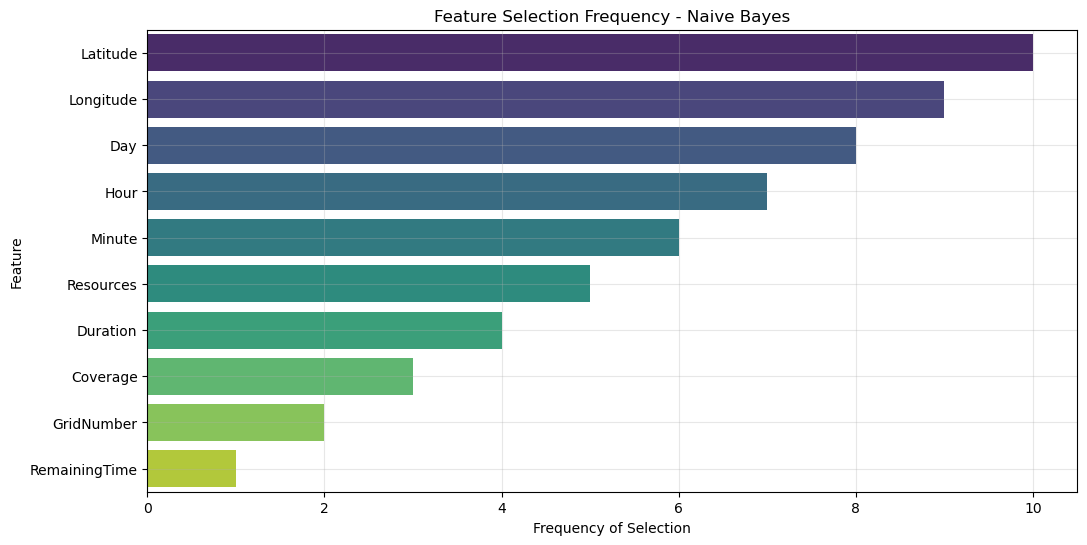


Analyzing Forward Selection for KNN Classifier

Feature Frequency Analysis - KNN:
          Feature  Frequency
0     GridNumber         10
1      Longitude          9
2       Latitude          8
3    OnPeakHours          7
4            Day          6
5           Hour          5
6      Resources          4
7  RemainingTime          3
8       Duration          2
9         Minute          1


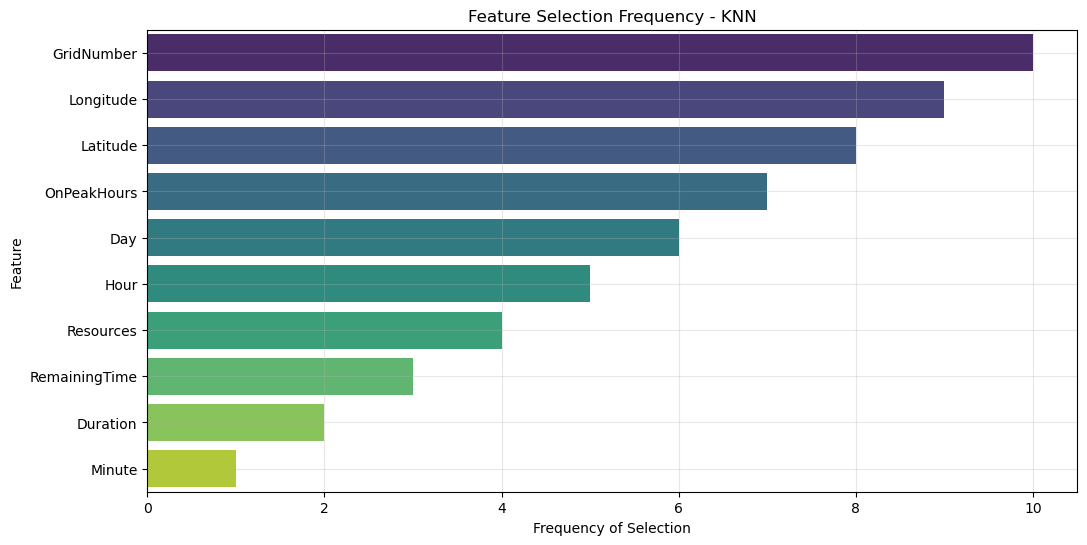

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif, SequentialFeatureSelector
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from collections import Counter

def analyze_forward_selection(features_list, classifier_name):
    """
    Analyze the frequency of features selected during Sequential Forward Selection.
    """
    # Flatten the list of selected features and count occurrences
    flat_features = [feature for sublist in features_list for feature in sublist]
    feature_counts = Counter(flat_features)
    
    # Create DataFrame to display the frequency of selected features
    feature_freq_df = pd.DataFrame({
        'Feature': list(feature_counts.keys()),
        'Frequency': list(feature_counts.values())
    }).sort_values('Frequency', ascending=False)
    
    print(f"\nFeature Frequency Analysis - {classifier_name}:\n", feature_freq_df)
    
    # Plot the frequency of selected features
    plt.figure(figsize=(12, 6))
    sns.barplot(data=feature_freq_df, x='Frequency', y='Feature', palette='viridis')
    plt.title(f'Feature Selection Frequency - {classifier_name}')
    plt.xlabel('Frequency of Selection')
    plt.ylabel('Feature')
    plt.grid(True, alpha=0.3)
    plt.show()

# Perform Forward Selection Analysis for Naive Bayes
print("\nAnalyzing Forward Selection for Naive Bayes Classifier")
analyze_forward_selection(nb_fs_features, "Naive Bayes")

# Perform Forward Selection Analysis for KNN
print("\nAnalyzing Forward Selection for KNN Classifier")
analyze_forward_selection(knn_fs_features, "KNN")

## Part 5: Clustering of Geographic Features

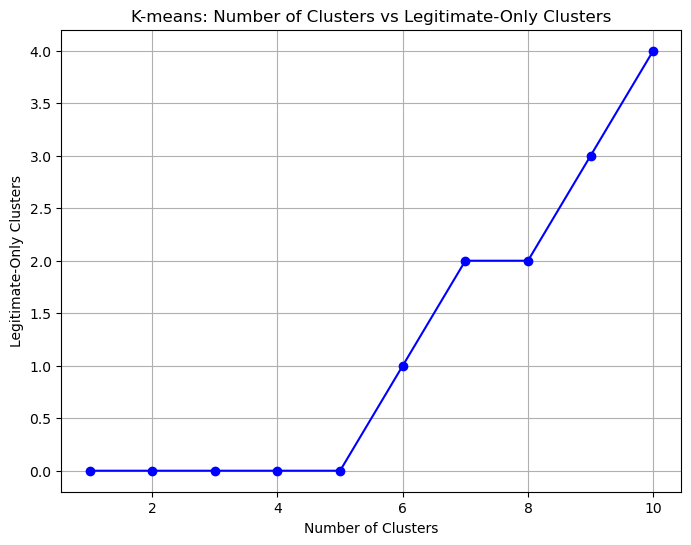

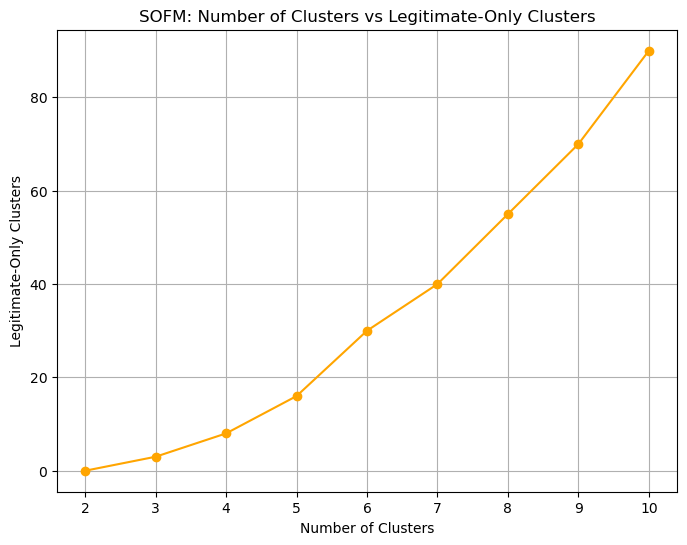

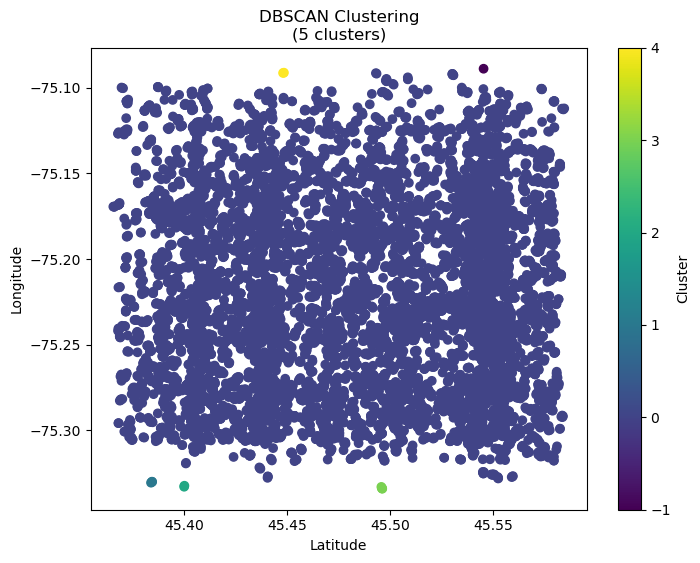


DBSCAN Clustering Results:
--------------------------------------------------
Number of clusters: 5
Epsilon: 0.0101
Min samples: 2

Legitimate-only clusters:
Noise cluster: 1
Cluster 1: 3
Cluster 2: 2
Cluster 3: 4
Cluster 4: 2


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from minisom import MiniSom
from collections import Counter

# Read the data
df = pd.read_csv('MCSDatasetNEXTCONLab.csv')

# Extract latitude and longitude features
X = df[['Latitude', 'Longitude']].values
y = df['Legitimacy'].values

# (a) K-means clustering analysis (legitimate-only clusters)
def analyze_kmeans_clusters(X, y, max_clusters=10):
    legitimate_only_clusters = []
    for n_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=0)
        cluster_labels = kmeans.fit_predict(X)
        legitimate_only_count = sum(
            np.all(y[cluster_labels == i] == 1) for i in range(n_clusters)
        )
        legitimate_only_clusters.append(legitimate_only_count)
    return legitimate_only_clusters

# (b) Updated SOFM clustering analysis (legitimate-only clusters)
def analyze_sofm_clusters(X, y, max_clusters=10, epochs=100, sigma=1.0, learning_rate=0.5):
    cluster_sizes = range(2, max_clusters + 1)
    legitimate_only_counts = []

    # Iterate through different grid sizes to simulate varying cluster counts
    for grid_size in cluster_sizes:
        # Initialize the SOFM 
        som = MiniSom(x=grid_size, y=grid_size, input_len=X.shape[1], sigma=sigma, learning_rate=learning_rate, random_seed=0)
        som.random_weights_init(X)
        som.train(X, epochs, verbose=False)

        # Assign each data point to a cluster based on the BMU (Best Matching Unit)
        clusters = {}
        for idx, point in enumerate(X):
            winner = som.winner(point)
            cluster_id = winner[0] * grid_size + winner[1]  # Flatten the 2D grid to 1D
            if cluster_id not in clusters:
                clusters[cluster_id] = []
            clusters[cluster_id].append(idx)

        # Count the number of legitimate-only clusters (clusters with only legitimate members)
        legitimate_only_count = 0
        for cluster_id, indices in clusters.items():
            if np.all(y[indices] == 1):  # Check if all members in the cluster are legitimate
                legitimate_only_count += 1
        legitimate_only_counts.append(legitimate_only_count)

    return cluster_sizes, legitimate_only_counts

# (c) Updated DBSCAN clustering analysis (legitimate-only clusters)
def analyze_dbscan_clusters(X, y):
    distances = np.sqrt(((X[:, None] - X) ** 2).sum(axis=2))
    min_dist = distances[distances > 0].min()
    max_dist = distances.max()
    
    eps_range = np.linspace(min_dist, max_dist / 5, 25)
    min_samples_range = range(2, 10)
    
    target_clusters = 5
    best_diff = float('inf')
    best_params = None
    best_result = None
    
    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            cluster_labels = dbscan.fit_predict(X)
            n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
            
            if n_clusters > 0:
                legitimate_only_counts = []
                for cluster in range(-1, max(cluster_labels) + 1):
                    cluster_members = y[cluster_labels == cluster]
                    if np.all(cluster_members == 1):  # Check if the entire cluster has legitimate members
                        legitimate_only_counts.append(np.sum(cluster_members == 1))
                
                diff = abs(n_clusters - target_clusters)
                if diff < best_diff:
                    best_diff = diff
                    best_params = (eps, min_samples)
                    best_result = {
                        'n_clusters': n_clusters,
                        'eps': eps,
                        'min_samples': min_samples,
                        'legitimate_only_counts': legitimate_only_counts,
                        'labels': cluster_labels
                    }
    
    return best_result

# Perform analyses
kmeans_results = analyze_kmeans_clusters(X, y)
sofm_cluster_sizes, sofm_legitimate_only_counts = analyze_sofm_clusters(X, y)
dbscan_results = analyze_dbscan_clusters(X, y)

# K-means Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(kmeans_results) + 1), kmeans_results, marker='o', color='blue')
plt.title('K-means: Number of Clusters vs Legitimate-Only Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Legitimate-Only Clusters')
plt.grid(True)
plt.show()

# SOFM Plot
plt.figure(figsize=(8, 6))
plt.plot(sofm_cluster_sizes, sofm_legitimate_only_counts, marker='o', color='orange')
plt.title('SOFM: Number of Clusters vs Legitimate-Only Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Legitimate-Only Clusters')
plt.grid(True)
plt.show()

# DBSCAN Results Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=dbscan_results['labels'], cmap='viridis')
plt.title(f'DBSCAN Clustering\n({dbscan_results["n_clusters"]} clusters)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar(label='Cluster')
plt.show()

# Print DBSCAN results
print("\nDBSCAN Clustering Results:")
print("-" * 50)
print(f"Number of clusters: {dbscan_results['n_clusters']}")
print(f"Epsilon: {dbscan_results['eps']:.4f}")
print(f"Min samples: {dbscan_results['min_samples']}")
print("\nLegitimate-only clusters:")
for i, count in enumerate(dbscan_results['legitimate_only_counts']):
    if i == 0 and dbscan_results['labels'].min() == -1:
        print(f"Noise cluster: {count}")
    else:
        print(f"Cluster {i}: {count}")
